# **Maximum Likelihood Parameter Estimation**

Cannot really import all the test c this time the formatting isn't correct and the formulas aren't recognized in the text / markup :/

In [ ]:
import numpy as np
import matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
na = np.newaxis #adding a new dimension to the plot : default : 2 obviously ... Anyways
log = np.log

On commence par définir une fonction sur mesure pour la probability distribution function

In [ ]:
def pdf(X,THETA):
  return (1.0/np.pi)*(1.0/np.pi)*(1.0 / (1+(X-THETA)**2))

#Question 1

In [ ]:
def ll(D,THETA):   #La somme des logs pour différentes valeurs de THETA ... on ne maximise donc pas au travers d'un dérivation mais en choisissant la plus grande somme
  return log(pdf(D[:,na],THETA[na,:])).sum(axis=0)


In [ ]:
D = np.array([ 2.803, -1.563, -0.853, 2.212, -0.334, 2.503])
print(D[:,na])

THETA = np.linspace(-10,10,1001)

[[ 2.803]
 [-1.563]
 [-0.853]
 [ 2.212]
 [-0.334]
 [ 2.503]]


numpy.linspace returns a array of evenly spaced intervals over the specified interval and number of increments

synthax : numpy.linspace(start, stop, number_of_increments ..)

Text(0, 0.5, '$\\log p(\\mathcal{D}|\\theta)$')

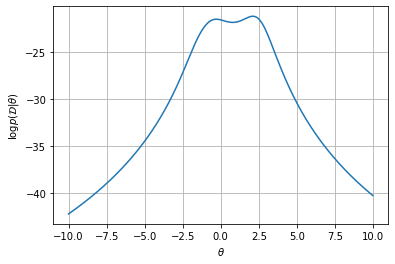

In [ ]:
plt.grid(True)
plt.plot(THETA, ll(D,THETA))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p(\mathcal{D}|\theta)$')

On remarque ici que la fonction n'est pas concave et possède deux maximum, un global et un local, on ne peut pas choisir facilement l'optimum

## **Building a classifier**

In [ ]:
D1 = np.array([ 2.803, -1.563, -0.853, 2.212, -0.334, 2.503])
D2 = np.array([-4.510, -3.316, -3.050, -3.108, -2.315])

In [ ]:
np.argmax(ll(D1,THETA))

606

In [ ]:
class MLClassifier:
  def fit(self,THETA,D1,D2): #self is always pointing the the current object
    self.theta1 = THETA[np.argmax(ll(D1,THETA))]
    self.theta2 = THETA[np.argmax(ll(D2,THETA))]

  def predict(self,X,p1,p2):
   return log(pdf(X,self.theta1)) - log(pdf(X,self.theta2)) + log(p1) - log(p2)




"self" is always pointing to the current object. It represents the instance of the class. By using the “self” keyword we can access the attributes and methods of the class in python

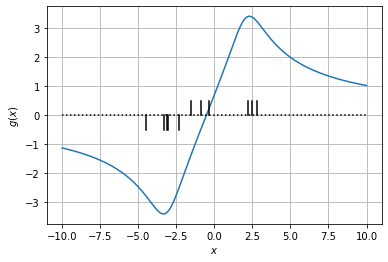

In [ ]:
X = np.linspace(-10,10,1001)
plt.grid(True)
mlcl = MLClassifier()
mlcl.fit(THETA,D1,D2)

plt.plot(X,mlcl.predict(X,0.5,0.5))
plt.plot(X,0*X,color='black',ls='dotted')

plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
for d1 in D1: plt.plot([d1,d1],[0,+0.5],color='black')
for d2 in D2: plt.plot([d2,d2],[0,-0.5],color='black')

We see that one of the 'posible solution' from the precedent approach, if not the real maximum, isn't taken into consideratoin. It motivates us using a bayesian approach to see if this is would be more flexible with the possible answers.

Here, we observe that the model essentially learns a threshold classifier with threshold approximately − 0.5. However, we note that the threshold seems to
be too high to properly classify the data. One reason for this is the fact that **maximum likelihood estimate retains only the best parameter**. **Here, the model
for the first class focuses mainly on the peak at x = 2 and treat examples x < 0 as outliers, without considering the possibility that the peak at θ = 2 might
actually be the outlier**.

# **Bayesian shit**

**Trapezoidale integration  = methode des trapèzes**

In [ ]:
def integrate(f,t):
  return ((f[...,:-1] + f[...,1:])/2  * (t[1:]-t[-1])).sum(axis=-1) #trapezoidale integration

"..." elypsis object : iterates over everything basically 

In [ ]:
def prior(THETA): #definition de la pdf pour p(THETA) la pdf de la prior
  return pdf(0,THETA / 10.0) / 10.0

def posterior(D,THETA):
  density = pdf(D[:,na],THETA[na,:]).prod(axis=0)
  joint = density * prior(THETA)
  integral = integrate(joint,THETA)

  return joint/integral


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


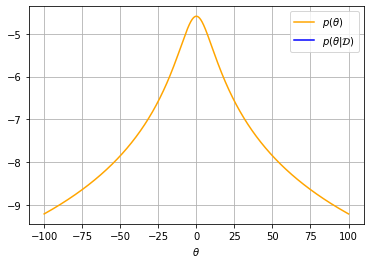

In [ ]:
THETA = np.linspace(-100,100,1001)

plt.grid(True)
plt.plot(THETA,np.log(prior(THETA)),label=r'$p(\theta)$', color="orange")
plt.plot(THETA,np.log(posterior(D,THETA)),label=r'$p(\theta|\mathcal{D})$',color='blue')
plt.legend();plt.xlabel(r'$\theta$');plt.show()

#plt.legend() without any arguments for an automatic detection of what should be in the legend.
#plt.legend(["A simple line"]) for another case : here legend is / / are the elements of the 

We observe that the posterior distribution is more concentrated to the specific values of the parameter that explain the dataset well. In particular, we
observe the same two peaks around θ = − 0.5 and θ = 2 observed in the maximum likelihood exercise.

PB ici jen'ai pas le meme resultat que le prof ... en gros p(D|O) ne s'affiche pas ... division par zero ? "invalid value encounteredin log"

Bayes Classifier 

In [ ]:
class BayesClassifier:

  def fit(self,THETA,D1,D2):

    self.pos1  = posterior(D1,THETA)
    self.pos2  = posterior(D2,THETA)

    self.THETA = THETA

  def predict(self,X,p1,p2):

    density = pdf(X[:,na],self.THETA[na,:])

    joint1  = density * self.pos1
    joint2  = density * self.pos2

    pdf1 = integrate(joint1,self.THETA)
    pdf2 = integrate(joint2,self.THETA)

    return log(pdf1) - log(pdf2) + log(p1) - log(p2)

We note that the function predict is computationally more expensive than the one for maximum likelihood since it involves computing an integral for
each point to be predicted.
However, the quality of the prediction also differs compared to that of the maximum likelihood method. In the plot below, we compare the ML and Bayes
approaches.

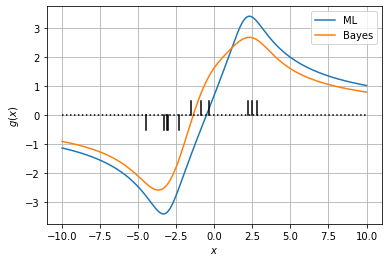

In [ ]:
X = np.linspace(-10,10,1001)
bacl = BayesClassifier()
bacl.fit(THETA,D1,D2)
plt.grid(True)
plt.plot(X,mlcl.predict(X,0.5,0.5),label='ML')
plt.plot(X,bacl.predict(X,0.5,0.5),label='Bayes')
plt.plot(X,0*X,color='black',ls='dotted')
plt.xlabel(r'$x$'); plt.ylabel(r'$g(x)$')
plt.legend()
for d1 in D1: plt.plot([d1,d1],[0,+0.5],color='black')
for d2 in D2: plt.plot([d2,d2],[0,-0.5],color='black')

We observe that the Bayes classifier has generally lower output scores and its decision boundary has been noticeably shifted to the left, leading to better predictions for the current data. 

In this particular case, the difference between the two models can be explained by the fact that the Bayes one better integrates the possibility that negative examples for the first class are not necessarily outliers.